<h1>Various script file for Flat-band Lieb lattice<h1>

<h3>1. Disperion, DOS, ENTROPY for U=0<h3>

<p>This is the python3 script to calculte the dispersion, density of state, and entropy of the non-interacting Lieb lattice<p> $$\mathcal{\hat H}_0 = \sum_{i,j,\alpha,\beta,\sigma} K_{\alpha,\beta}(i-j) \hat{c}^\dagger_{{i}\alpha\sigma} \hat{c}_{j\beta\sigma}$$ 
    
    
  <p>where<p>
                  $$\begin{split}
           \widetilde{K}(k) = t\begin{pmatrix}
V & 1 + e^{ik_1}& 1 + e^{ik_2} & 0 \\ 
1 + e^{-ik_1} & 0 & 0 & 1 + e^{ik_2} \\
1 + e^{-ik_2} & 0 & 0 & 1 + e^{ik_1} \\
0 & 1 + e^{-ik_2} &  1 + e^{-ik_1} & 0 \\
\end{pmatrix}\,.
\end{split}$$

In [1]:
#! /bin/bash/python3
import numpy as np 
from numpy import tile
import matplotlib.pyplot as plt
#from numpy import linalg as LA
from scipy import linalg as LA
import math,cmath
pi = math.pi
cos = math.cos
sin = math.sin
#exp = cmath.exp
exp=np.exp
sqrt = math.sqrt
#log=math.log
log=np.log


In [2]:
from numpy.linalg import inv
from numpy import zeros
import main

In [3]:
# Now you can call defined function that module as follows
t1=1.0
t2=0.0
a=1.0
Nk=20
mass=0.0
density=0.0
dim=0.0
totomega=800
m=0.0
sigma=0
energy=-.00
Ef=25.0
temp=0.5
#main.band(t1,t2,a,Nk,density,mass,dim,totomega,m,sigma,square=False)
main.onedim(t1,t2,a,Nk,mass,dim,totomega,square=True)
for temp in range(1,100):
	g=main.fermi(energy , 0.0 , temp)
	print (temp, g)

1.0 0.0 1.0 20
1 0.5
2 0.5
3 0.5
4 0.5
5 0.5
6 0.5
7 0.5
8 0.5
9 0.5
10 0.5
11 0.5
12 0.5
13 0.5
14 0.5
15 0.5
16 0.5
17 0.5
18 0.5
19 0.5
20 0.5
21 0.5
22 0.5
23 0.5
24 0.5
25 0.5
26 0.5
27 0.5
28 0.5
29 0.5
30 0.5
31 0.5
32 0.5
33 0.5
34 0.5
35 0.5
36 0.5
37 0.5
38 0.5
39 0.5
40 0.5
41 0.5
42 0.5
43 0.5
44 0.5
45 0.5
46 0.5
47 0.5
48 0.5
49 0.5
50 0.5
51 0.5
52 0.5
53 0.5
54 0.5
55 0.5
56 0.5
57 0.5
58 0.5
59 0.5
60 0.5
61 0.5
62 0.5
63 0.5
64 0.5
65 0.5
66 0.5
67 0.5
68 0.5
69 0.5
70 0.5
71 0.5
72 0.5
73 0.5
74 0.5
75 0.5
76 0.5
77 0.5
78 0.5
79 0.5
80 0.5
81 0.5
82 0.5
83 0.5
84 0.5
85 0.5
86 0.5
87 0.5
88 0.5
89 0.5
90 0.5
91 0.5
92 0.5
93 0.5
94 0.5
95 0.5
96 0.5
97 0.5
98 0.5
99 0.5


In [ ]:
dispersion_data=np.loadtxt("dispersion_lieb.dat")
#dispersion_data=np.loadtxt("oned.dat")
print (dispersion_data.shape)
kvecs = np.loadtxt("kvecs.dat")
print (kvecs)


<p>-----------------------------------------------------------------------------<p>
<p> Dispersion relation DMFT <p>

In [ ]:
X,Y=np.meshgrid(kvecs[:,0],kvecs[:,1])
Zup=dispersion_data[:,0].reshape(Nk,Nk)
Zdw=dispersion_data[:,1].reshape(Nk,Nk)
Zflat=dispersion_data[:,2].reshape(Nk,Nk)
#Ztop=dispersion_data[:,3].reshape(Nk,Nk)



In [ ]:
%matplotlib notebook
from matplotlib import interactive
interactive(True)
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.gca(projection='3d')
# Plot the surface.
ax.set_xlabel('$k_x$')
ax.set_ylabel('$k_y$')
ax.set_zlabel('$E$')


surf = ax.plot_surface(X, Y,Zup, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
surf = ax.plot_surface(X, Y,Zdw, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
surf = ax.plot_surface(X, Y,Zflat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
#surf = ax.plot_surface(X, Y,Ztop, cmap=cm.coolwarm,
#                       linewidth=0, antialiased=False)
#plt.savefig('dispersion_mass_8_2D.png')
plt.show()





In [ ]:
wavefn=np.loadtxt("wavefn.dat")
print (wavefn.shape)

In [ ]:
wavefn=np.reshape(wavefn,((80,80,4,4,4)))
print(wavefn[:,:,0,0,0])
Zup=wavefn[:,:,0,0,0]+wavefn[:,:,0,0,1]+wavefn[:,:,0,0,2]+wavefn[:,:,0,0,3]
#%matplotlib notebook
#from matplotlib import interactive
#interactive(True)
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.gca(projection='3d')
# Plot the surface.
ax.set_xlabel('$k_x$')
ax.set_ylabel('$k_y$')
ax.set_zlabel('$E$')


surf = ax.plot_surface(X, Y,Zup, cmap=cm.coolwarm,
                    linewidth=0, antialiased=False)
surf = ax.plot_surface(X, Y,Zdw, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
surf = ax.plot_surface(X, Y,Zflat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
surf = ax.plot_surface(X, Y,Ztop, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
#plt.savefig('dispersion_mass_8_2D.png')
plt.show()


In [5]:
dos_data=np.loadtxt("dos.dat")
#dos_data1=np.loadtxt("dos1.dat")
#dos_data2=np.loadtxt("dos2.dat")
#dos_data3=np.loadtxt("dos3.dat")
print (dos_data.shape)
#print (dos_data1.shape)
#print (dos_data2.shape)
#print (dos_data3.shape)
print (dos_data)

(799, 6)
[[-9.98  0.    0.    0.    0.    0.  ]
 [-9.95  0.    0.    0.    0.    0.  ]
 [-9.93  0.    0.    0.    0.    0.  ]
 ...
 [ 9.93  0.    0.    0.    0.    0.  ]
 [ 9.95  0.    0.    0.    0.    0.  ]
 [ 9.98  0.    0.    0.    0.    0.  ]]


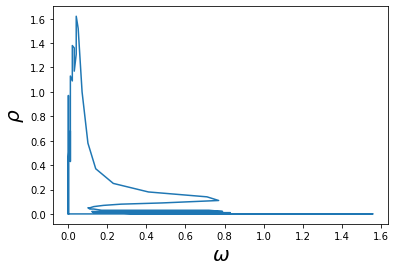

In [6]:
plt.figure()


# Plot the surface.
plt.ylabel(r'$\rho$',size=20)
plt.xlabel(r'$\omega$',size=20)
#plt.ylim(0,1)

plt.plot()
plt.plot(dos_data[:,0],dos_data[:,2])
#plt.plot(dos_data[:,0],dos_data2[:,1])
#plt.plot(dos_data[:,0],dos_data3[:,1])
#plt.plot(dos_data[:,1],dos_data[:,2]+dos_data1[:,2]+dos_data2[:,2])
#plt.plot(dos_data[:,0],dos_data[:,4])
#plt.gca().legend(('Gc','Gf'))
#plt.ylim([0,0.25])
#plt.xlim([-2,2])
#plt.savefig('oned_dos_V_8_2D.png')
plt.show()



In [ ]:

tmp=np.loadtxt("square_gamma_x_m_gamma.dat")
#tmp[:,2]
plt.axvline(x=np.pi,color='grey',linestyle='--')
plt.axvline(x=2.0*np.pi,color='grey',linestyle='--')
plt.ylabel(r'$\epsilon_k$',size=20)
plt.xlabel(r'$k$',size=20)
#plt.plot(tmp[0,tmp[0,:,2])
plt.plot(tmp[:,2],tmp[:,3])
plt.plot(tmp[:,2],tmp[:,4])
plt.plot(tmp[:,2],tmp[:,5])
plt.plot(tmp[:,2],tmp[:,6])
plt.ylim(-2,2)
tick_pos= [0, np.pi , 2*np.pi, 4*np.pi]
labels = ['$\Gamma$', '$X$', '$M$','$\Gamma$']
plt.xticks(tick_pos, labels)

#plt.savefig('dispersion_symm_8_2D.png')

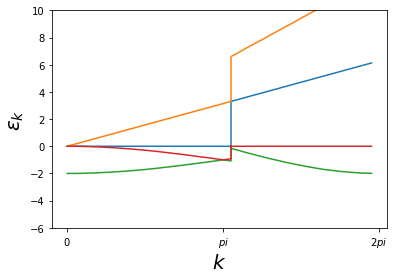

In [4]:
tmp=np.loadtxt("square_gamma_x_m_gamma.dat")
#tmp[:,2]

plt.ylabel(r'$\epsilon_k$',size=20)
plt.xlabel(r'$k$',size=20)
#plt.plot(tmp[0,tmp[0,:,2])
plt.plot(tmp[:,0],tmp[:,1])
plt.plot(tmp[:,0],tmp[:,2])
plt.plot(tmp[:,0],tmp[:,3])
plt.plot(tmp[:,0],tmp[:,4])
plt.ylim(-6,10)
tick_pos= [0, np.pi , 2*np.pi]
labels = ['$0$', '$pi$', '$2pi$']
plt.xticks(tick_pos, labels)

#plt.savefig('oned_dispersion_symm_V_8.png')
plt.show()

In [ ]:
entropy_data=np.loadtxt("entropy.dat")
print (entropy_data.shape)

In [ ]:
plt.figure()


# Plot the surface.
plt.ylabel('S')
plt.xlabel('T')
#plt.ylim(0,5)

plt.plot(entropy_data[:,0],entropy_data[:,1])

plt.show()